In [1]:
# Import
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

-------------------------------
## Content
[1. Similarity measures](#1.-Similarity-measures)

[2. Simulations (Presented in Manuscript)](#2.-Simulations-(Presented-in-Manuscript))

[3. Playing around with other simulations](#3.-Playing-around-with-other-simulations)


-------------------------------
### 1. Similarity measures

In [2]:
def intersection(str1, str2):
    return len(np.intersect1d(str1, str2))

In [17]:
def pairedFreq(str2, str1):
    #print('strings', str1, str2)
    
    # Transform to correct input format, if it isn't already a list or a numpy array
    try:
        str1 = str1.values.tolist()
        str2 = str2.values.tolist()
    except:
        pass
    
    if len(str2) == 0:
        return []
    ob_freq = 0
    for i in range(len(str2)-1):
        p1 = str2[i]
        p2 = str2[i+1]
        if p1 in str1 and p2 in str1:
            i1 = np.nonzero(np.array(str1) == p1)
            i2 = np.nonzero(np.array(str1) == p2)
            #print('i1, i2', i1, i2)
            if abs(i1[0] - i2[0]) == 1:
                ob_freq += 1
                #print(ob_freq)
    #print(str2)
    #print(str1)
    #print("ob_freq=", ob_freq)
    
    if str2 == []:
        return 0

    
    # This is the code from Christian
    # num_common_items = len(final)
    # 
    # num_common_items = np.intersect1d(final, orig)
    # print("num_common_items=", num_common_items)
    # 
    # if type(num_common_items) == np.dtype(int):
    #    num_common_items = 1
    # else:
    #    print(num_common_items)
    #    num_common_items = len(num_common_items)

    num_common_items = len(np.intersect1d(str1, str2)) #Alex New

    exp_freq = (2*num_common_items*(num_common_items-1)) / float(len(str2)*len(str1))
    #print("exp_freq=", exp_freq)
    PF = ob_freq - exp_freq
    #print("PF=", PF)
    return PF

In [18]:
def editdist(str1, str2, min_threshold = None):
  #"""Return approximate string comparator measure (between 0.0 and 1.0)
   #  using the edit (or Levenshtein) distance.

#  USAGE:
#    score = editdist(str1, str2, min_threshold)

#  ARGUMENTS:
#    str1           The first string
#    str2           The second string
#    min_threshold  Minimum threshold between 0 and 1
#
#  DESCRIPTION:
#    The edit distance is the minimal number of insertions, deletions and
#    substitutions needed to make two strings equal.#
#
#    For more information on the modified Soundex see:
#    - http://www.nist.gov/dads/HTML/editdistance.html
#  """

#  # Quick check if the strings are empty or the same - - - - - - - - - - - - -
#  #
#  #if (str1 == '') or (str2 == ''):
    if (str1.size == 0) or (str2.size == 0):
        return 0.0
    #if len(str1) == len(str2) and len(str1) > 1 and all(str1 == str2):
    #    return 1.0
    #elif len(str1) == len(str2) and len(str1) == 1 and (str1 == str2):
    #    return 1.0

    n = len(str1)
    m = len(str2)
    max_len = max(n,m)

    if (min_threshold != None):
        if (isinstance(min_threshold, float)) and (min_threshold > 0.0) and (min_threshold > 0.0):

            len_diff = abs(n-m)
            w = 1.0 - float(len_diff) / float(max_len)

            if (w  < min_threshold):
                return 0.0  # Similariy is smaller than minimum threshold

        else: # Calculate the maximum distance possible with this threshold
            max_dist = (1.0-min_threshold)*max_len

    else:
        logging.exception('Illegal value for minimum threshold (not between' + \
                        ' 0 and 1): %f' % (min_threshold))
        raise Exception

    if (n > m):  # Make sure n <= m, to use O(min(n,m)) space
        str1, str2 = str2, str1
        n, m =       m, n

    current = range(n+1)

    for i in range(1, m+1):

        previous = current
        current =  [i]+n*[0]
        str2char = str2[i-1]

        for j in range(1,n+1):
            substitute = previous[j-1]
            if (str1[j-1] != str2char):
                substitute += 1

      # Get minimum of insert, delete and substitute
      #
            current[j] = min(previous[j]+1, current[j-1]+1, substitute)

        if (min_threshold != None) and (min(current) > max_dist):
            return 1.0 - float(max_dist+1) / float(max_len)

    w = 1.0 - float(current[n]) / float(max_len)

    assert (w >= 0.0) and (w <= 1.0), 'Similarity weight outside 0-1: %f' % (w)

  # A log message - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
  #
    logging.debug('Edit-distance comparator string "%s" with "%s" value: %.3f' \
                % (str1, str2, w))
    return w

### 2. Simulations (Presented in Manuscript)

Want to show that PF is function of length of encoding list (proportional number of pairs but different length of list)

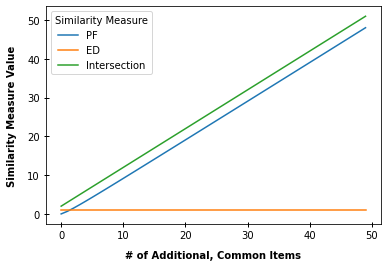

In [54]:
# Increasing number of common items & list length
PF = []
PF_new = []
ED = np.empty((0,1), int)
EncodingItems = []
value = []
measure = []
numberOfwords = 50
for x in range(numberOfwords):
    if x == 0:
        str1 = [1,2]
        str2 = [1,2]
    else:
        str1.append(x+2)
        str2.append(x+2)
    PF = (pairedFreq(str1, str2))
    intersect = intersection(str1, str2)
    str3 = np.array(str1)
    str4 = np.array(str2)
    addED = editdist(str3, str4, min_threshold = 0)
    ED = np.append(ED, addED)
    EncodingItems.append(x)
    EncodingItems.append(x)
    EncodingItems.append(x)
    value.append(PF)
    value.append(addED)
    value.append(intersect)
    measure.append('PF')
    measure.append('ED')
    measure.append('Intersection')
    df = pd.DataFrame({'#EncodingItems':EncodingItems, 'value':value, 'measure':measure})
df.to_csv('Similarity_Simulation1.csv')

ax = sns.lineplot(x='#EncodingItems', y=value, hue=measure, data=df)

#ax.set_xlim(0, 55)
ax.tick_params(direction='inout', which='both', length=5, width=1, colors='black', left=True, bottom=True)
ax.set_ylabel('Similarity Measure Value', labelpad=10, fontweight='bold')
ax.set_xlabel('# of Additional, Common Items', labelpad=10, fontweight='bold')

plt.legend(title='Similarity Measure', loc='upper left')
#ax.set_title('Increasing # of Common Items in Same Order')
plt.savefig('Similarity_Simulation1.png', dpi=600)

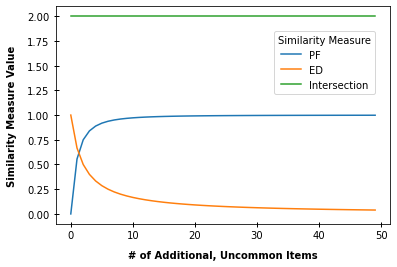

In [53]:
# Increasing number of uncommon items & list length
PF = []
intersect = []
ED = np.empty((0,1), int)
EncodingItems = []
value = []
measure = []
numberOfwords = 50
for x in range(numberOfwords):
    if x == 0:
        str1 = [1,2]
        str2 = [1,2]
    else:
        str1.append(x+2)
        str2.append(x+52)

    PF = (pairedFreq(str1, str2))
    intersect = intersection(str1, str2)
    str3 = np.array(str1)
    str4 = np.array(str2)
    addED = editdist(str3, str4, min_threshold = 0)
    ED = np.append(ED, addED)
        
    EncodingItems.append(x)
    EncodingItems.append(x)
    EncodingItems.append(x)

    value.append(PF)
    value.append(addED)
    value.append(intersect)

    measure.append('PF')
    measure.append('ED')
    measure.append('Intersection')
            
    df = pd.DataFrame({'#EncodingItems':EncodingItems, 'value':value, 'measure':measure})
df.to_csv('Similarity_Simulation2.csv')

ax = sns.lineplot(x='#EncodingItems', y=value, hue=measure, data=df)
#plt.xlabel(xlabel='# of Itmes')
#plt.ylabel(ylabel='Similarity Measure Value')
#ax.set_title('Increasing # of Uncommon Items with one Pair')

ax.tick_params(direction='inout', which='both', length=5, width=1, colors='black', left=True, bottom=True)
ax.set_ylabel('Similarity Measure Value', labelpad=10, fontweight='bold')
ax.set_xlabel('# of Additional, Uncommon Items', labelpad=10, fontweight='bold')
plt.legend(title='Similarity Measure', bbox_to_anchor=(0.97,0.91))

plt.savefig('Similarity_Simulation2.png', dpi=600)

### 3. Playing around with other simulations

Text(0.5, 1.0, 'Measures based on one pair and x recalled items')

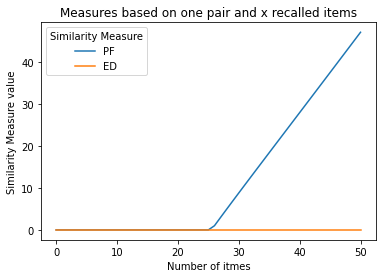

In [8]:
# 50% common, 50% different, no pairs
PF = []
ED = np.empty((0,1), int)
EncodingItems = []
value = []
measure = []
str1 = []
str2 = []
#print('ED', ED)
numberOfwords = 51
for x in range(numberOfwords):
    #print('trial', x)
    str1.append(x)
    str2.append(51-x)
    #print(str1, str2)
    #PF.append(pairedFreq(str1, str2))
    PF = (pairedFreq(str1, str2))
    #print('PF', PF)
    str3 = np.array(str1)
    str4 = np.array(str2)
    addED = editdist(str3, str4, min_threshold = 0)
    #print('addED', addED)
    ED = np.append(ED, addED)
    #EncodingItems.append(x)
    EncodingItems.append(x)
    EncodingItems.append(x)
    value.append(PF)
    value.append(addED)
    measure.append('PF')
    measure.append('ED')
    df = pd.DataFrame({'#EncodingItems':EncodingItems, 'value':value, 'measure':measure})

ax = sns.lineplot(x='#EncodingItems', y=value, hue=measure, data=df)
plt.xlabel(xlabel='Number of itmes')
plt.ylabel(ylabel='Similarity Measure value')
plt.legend(title='Similarity Measure', loc='upper left')
ax.set_title('Measures based on one pair and x recalled items')

In [9]:
# Other ideas
# Create word lists with different number of words and same number of pairs (lineplot)
# Create word lists with same number of words and different number of pairs (lineplot)
# Create word lists with diferent number of words and different number of pairs (bargraph)